# Exploratory Data Analysis of Diwali Sales

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')
#to avoid unicode errors use unicode_escape

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
#getting details of the file 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#now dropping null columns 
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [7]:
#again checking for unwanted columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
#finding null values in the file
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
#droping null values
df.dropna(inplace=True)

In [10]:
#again checking for null values
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
#changing data type of amount from float to int
df['Amount'] = df['Amount'].astype('int')

In [12]:
#checking data type of amount
df['Amount'].dtype

dtype('int32')

In [13]:
#checking columns
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
#describe() method returns the description of the data in data frame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [15]:
#using describe() method for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis.

### Gender

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

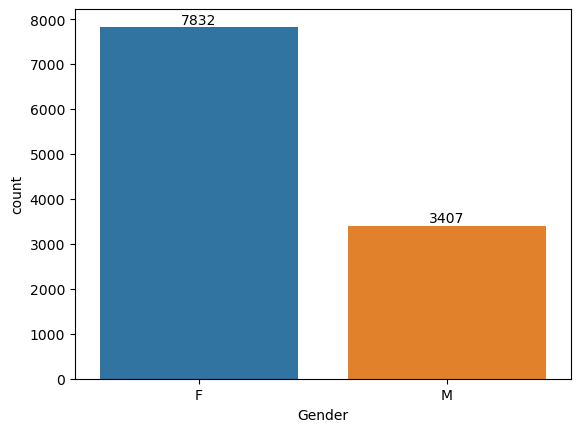

In [17]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [18]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


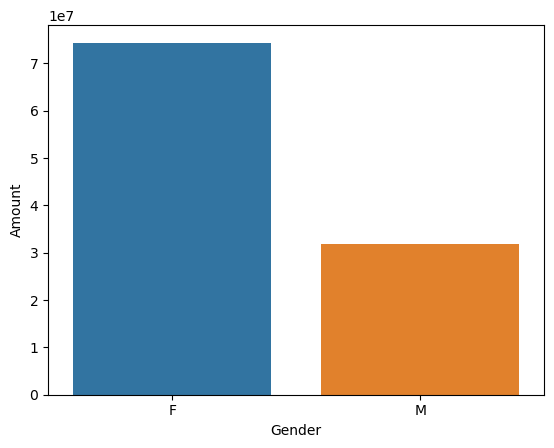

In [19]:
#total amount w.r.t. gender 
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax=sns.barplot(x='Gender', y='Amount', data=sales_gen)


From the above 2 graphs we can say that the most of the buyers are females and the amount spend by the female buyers is greater than male buyers.

### Age

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

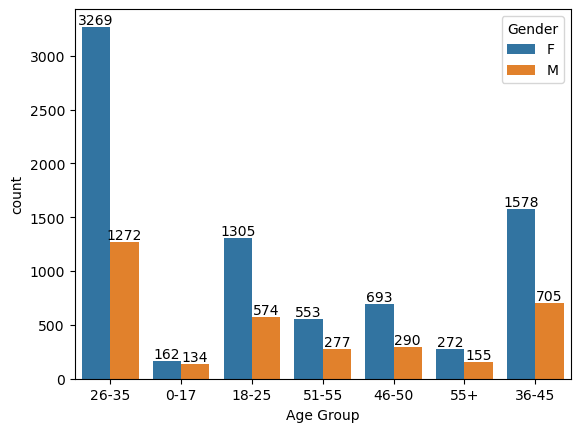

In [21]:
#which age group has more sales
ax=sns.countplot(x='Age Group', hue='Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

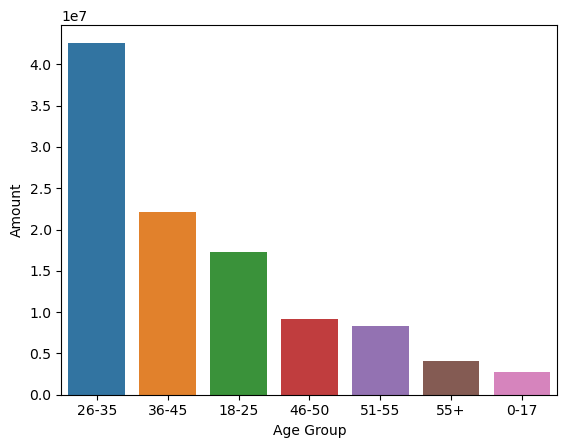

In [22]:
#total amount w.r.t. age group
sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax=sns.barplot(x='Age Group', y='Amount', data=sales_age)

From above 2 graphs we can see that the most of the buyers are females from age group between 26-35 also, the most amount spend by females from the age group between 26-35.

### State

In [23]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

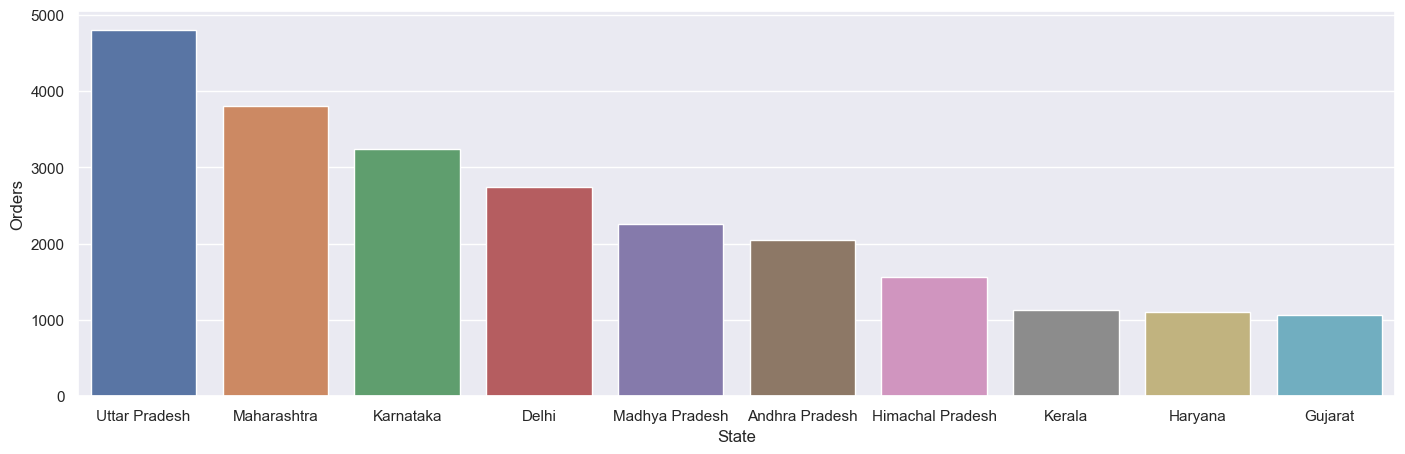

In [24]:
#total no.of orders from top 10 states
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(17,5)})
ax=sns.barplot(x='State', y='Orders', data=sales_state)

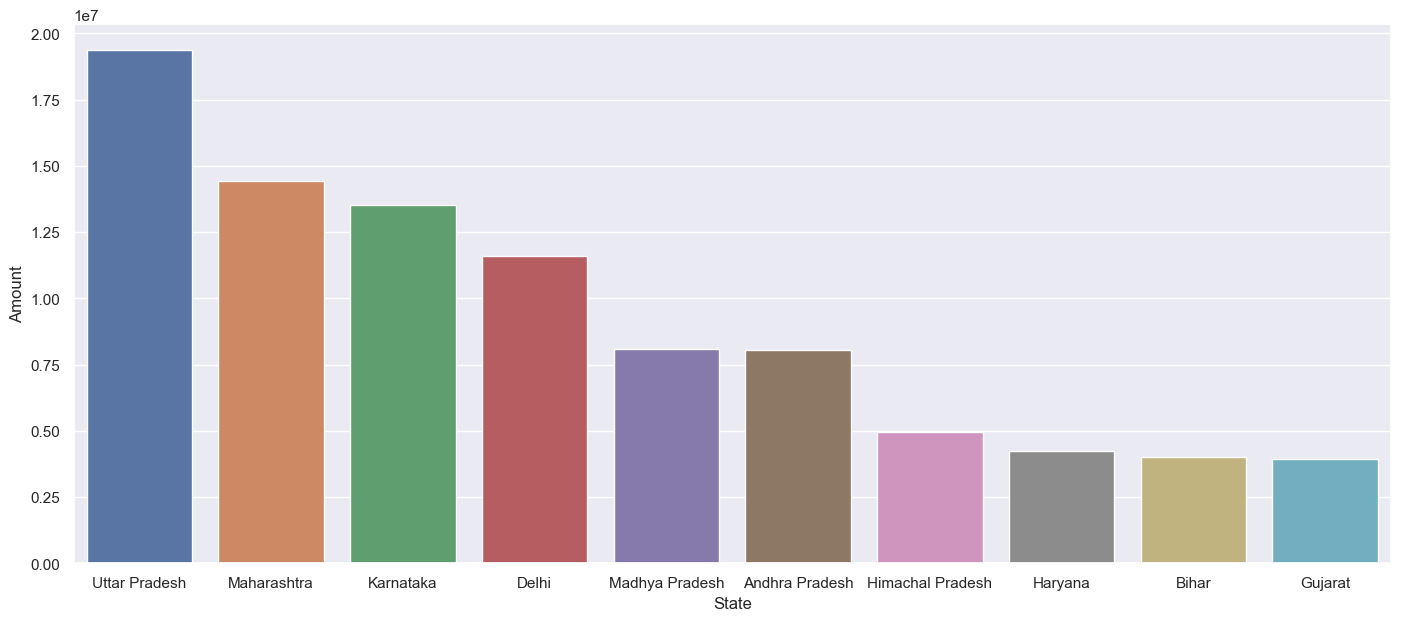

In [25]:
#total amount people spend from top 10 states
sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(17,7)})
ax=sns.barplot(x='State', y='Amount', data=sales_state)

From above two graphs we can say that the most of the orders and amount/sales are from Uttar Pradesh, Maharashtra and karnataka respectively.

### Marital Status

Here 0 = Married and 1 = Single

In [26]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

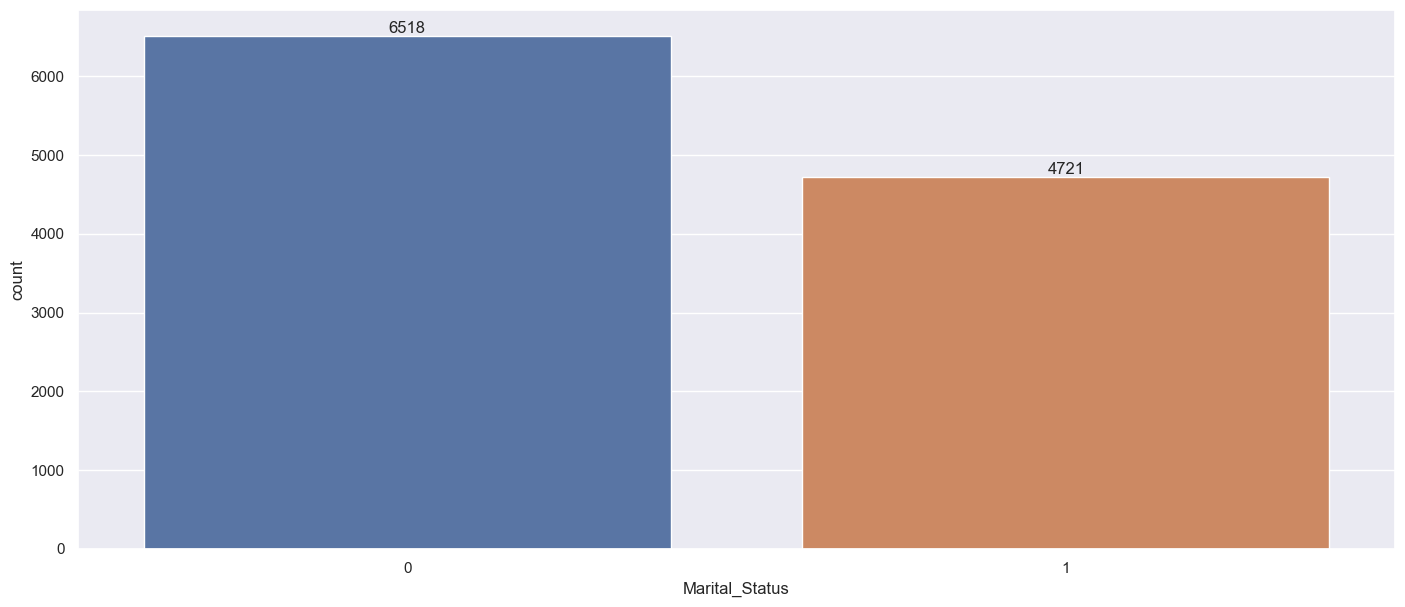

In [27]:
#buyers w.r.t. Marital Status
ax=sns.countplot(x='Marital_Status', data = df)
sns.set(rc={'figure.figsize':(7,1)})
for bars in ax.containers:
    ax.bar_label(bars)

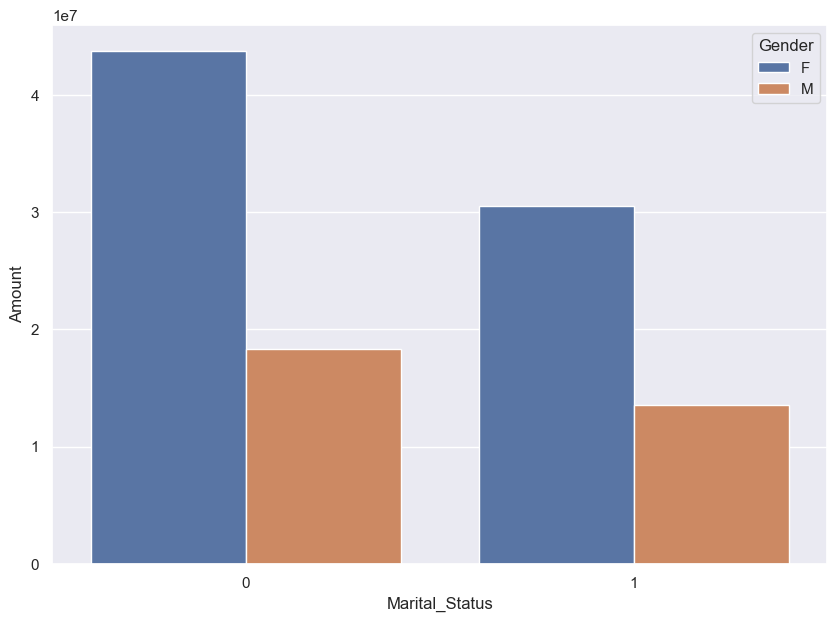

In [28]:
#total amount w.r.t. marital status
sales_ms = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(10,7)})
ax=sns.barplot(x='Marital_Status', y='Amount', hue='Gender', data=sales_ms)

From the above 2 graphs we can see that most of the buyers are married (females) and they have high purchasing power

### Occupation

In [29]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

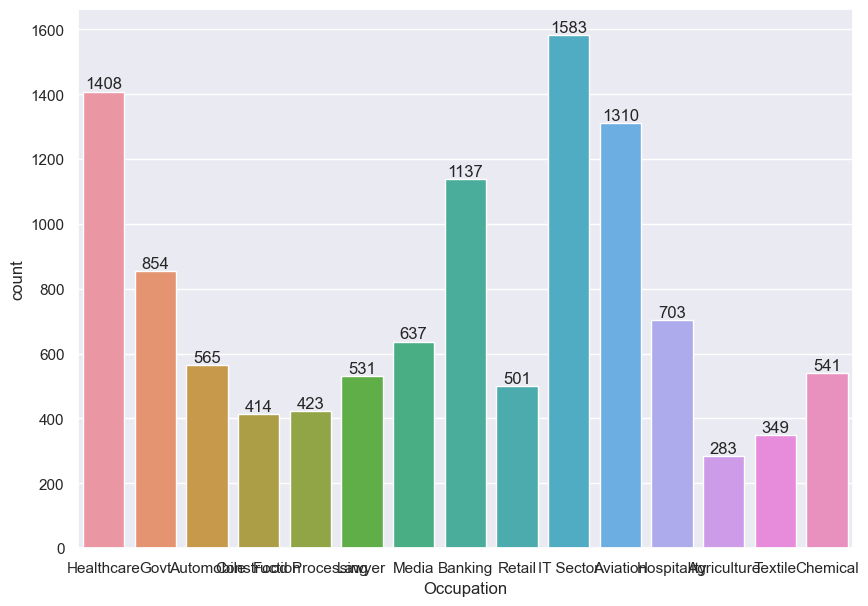

In [30]:
#Total count of buyers from different types of occupation
ax=sns.countplot(x='Occupation', data = df)
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

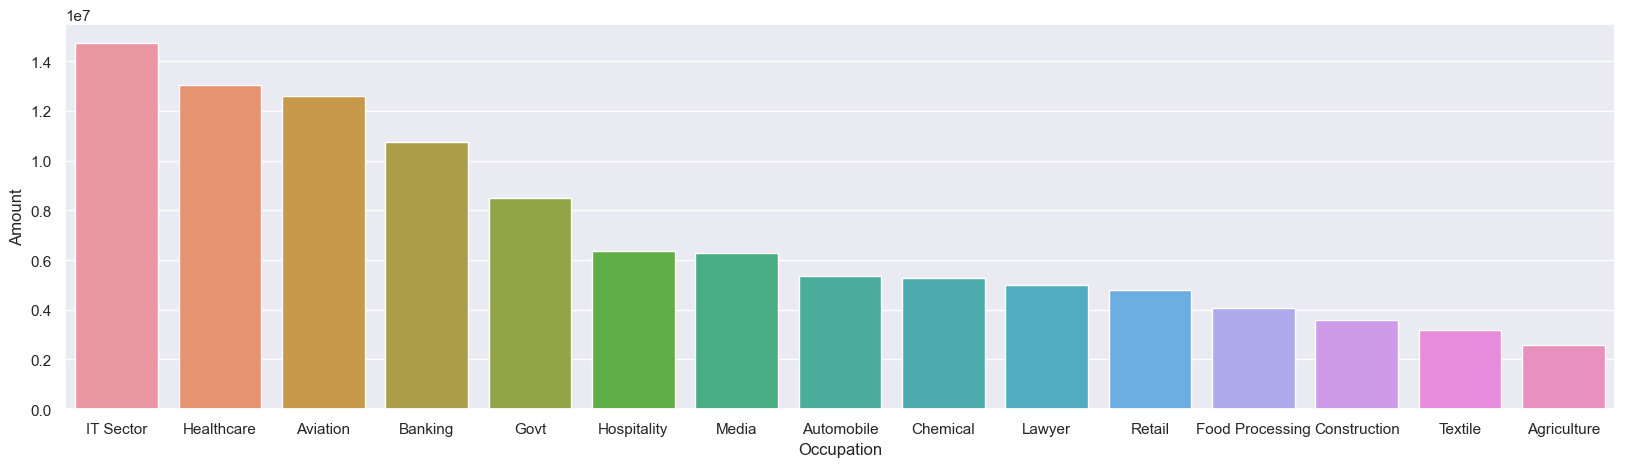

In [31]:
#People from which occupation spend more money 
sales_o = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(x='Occupation', y='Amount', data=sales_o)

From above 2 garphs we can say that peoples from IT, Healthcare and Aviation are top buyers and also these people have spend more money respectively.

### Product Category 

In [32]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

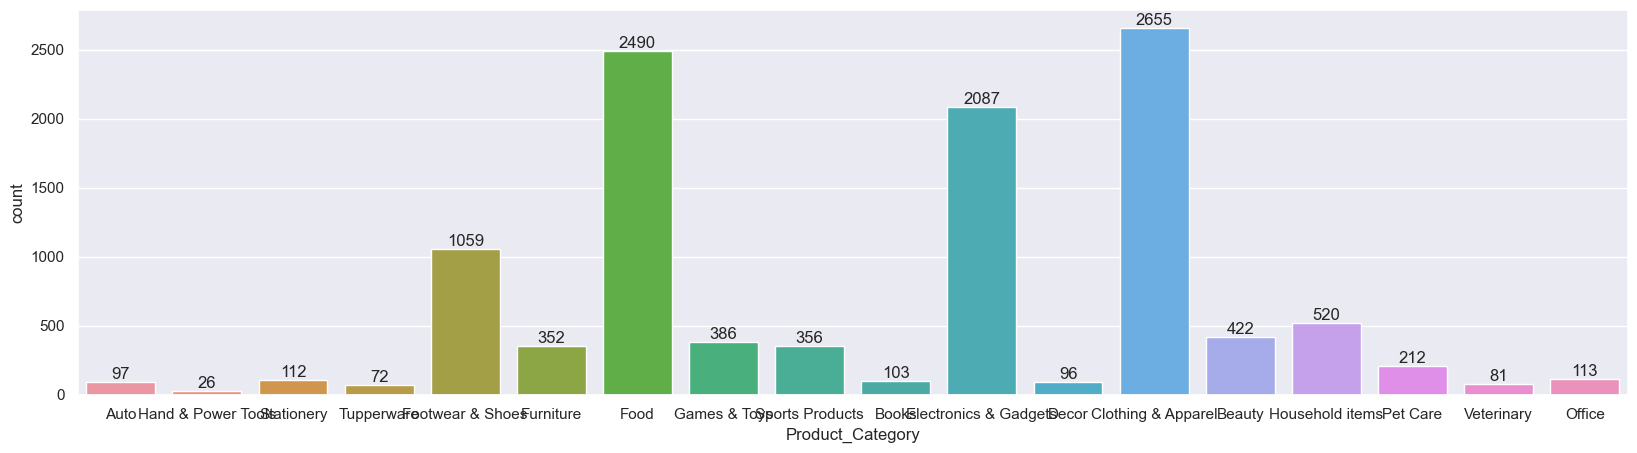

In [33]:
#count of sales w.r.t. product category 
ax=sns.countplot(x='Product_Category', data = df)
sns.set(rc={'figure.figsize':(25,10)})
for bars in ax.containers:
    ax.bar_label(bars)

Most sold product category is Clothing & Apperal followed by Food and Electronics & Gadgets

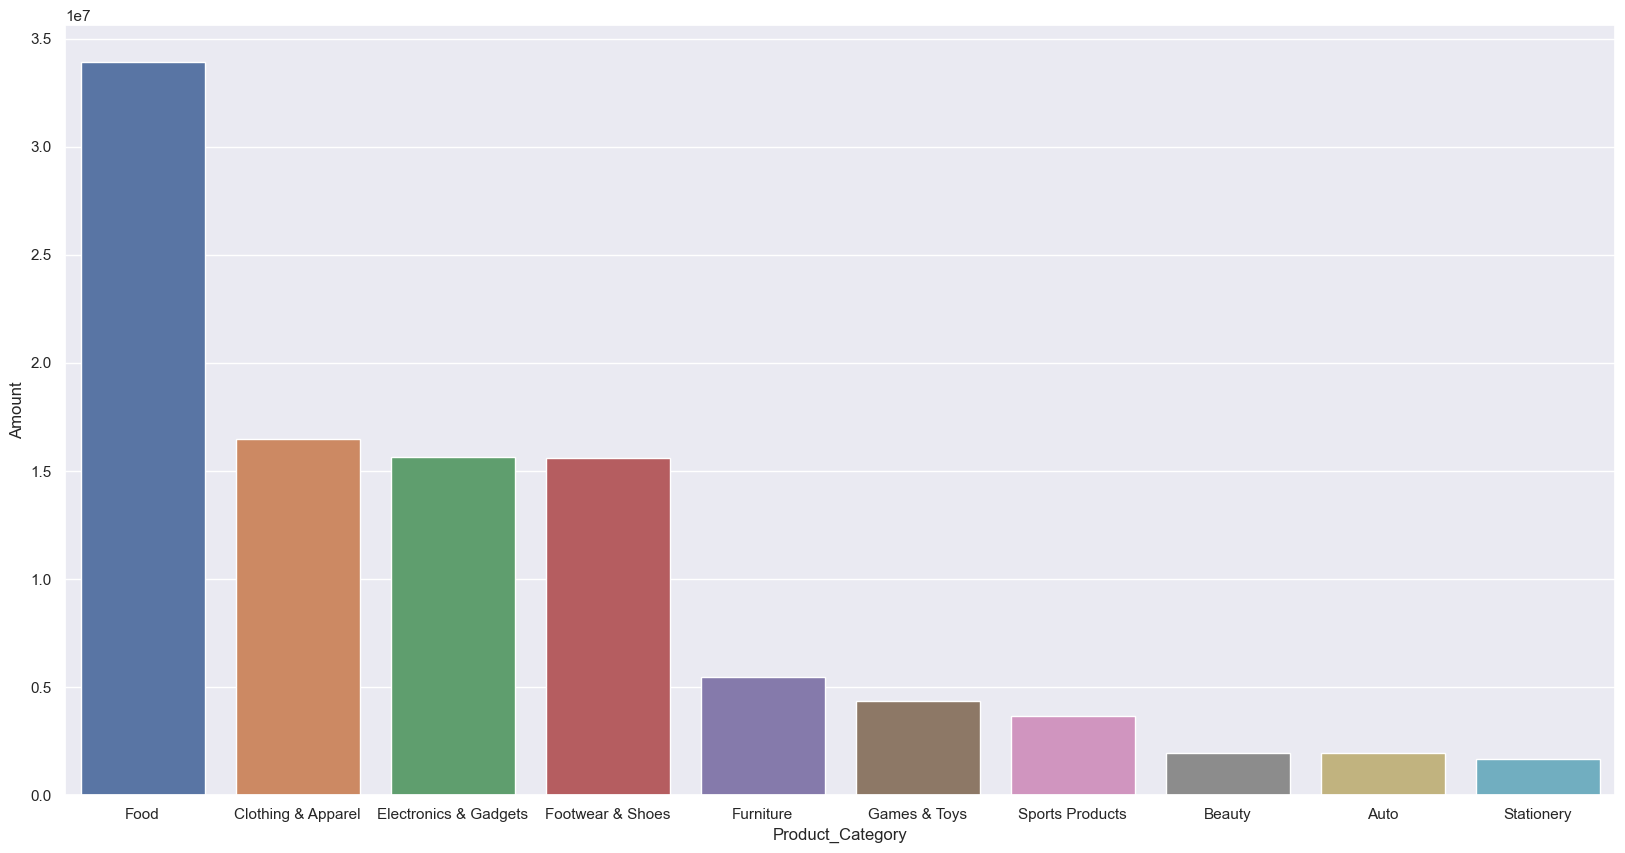

In [34]:
#On what product category people had spend more amount
sales_pc = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,10)})
ax=sns.barplot(x='Product_Category', y='Amount', data=sales_pc)

From above graph we can say that people have spend more amount on food followed by Clothing & Apparel and Electronics & Gadgets.

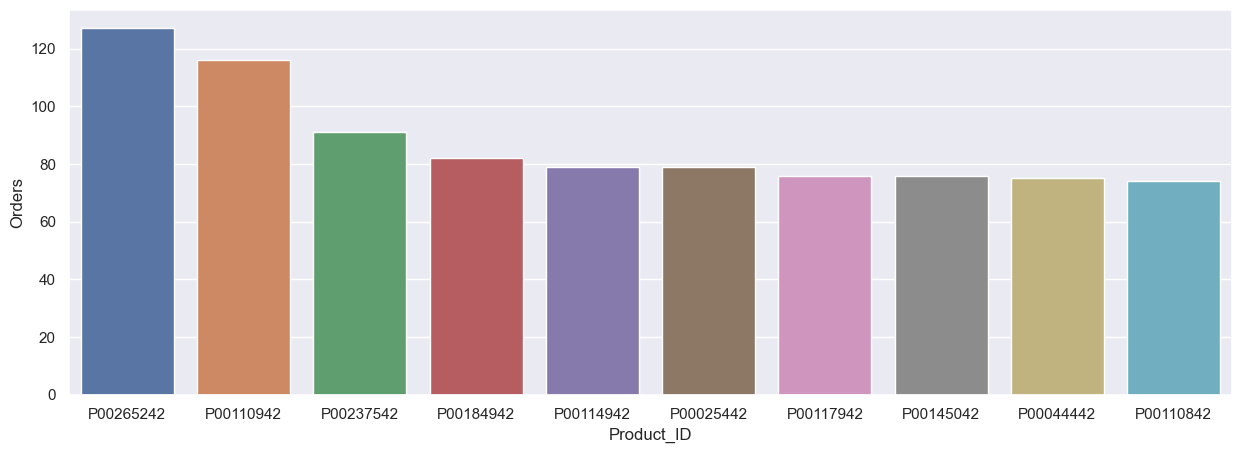

In [35]:
#looking for top 10 selling products
sales_pc = df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.barplot(x='Product_ID', y='Orders', data=sales_pc)

### Conclusion:

1. Female customers are more than male customers.

2. Female customers have spend more amount than male customers.

3. Age Group between 26-35 have more customers.

4. From the age group (26-35) female customers have spend more amount.

5. Top 10 states which have more number of order are:
    1. Uttar Pradesh
    2. Maharashtra
    3. Karnataka
    4. Delhi
    5. Madhya Pradesh
    6. Andra Pradesh 
    7. Himachal Pradesh
    8. Kerala
    9. Haryana
    10. Gujarat
    
6. Top 10 states where people have more amount are:
    1. Uttar Pradesh
    2. Maharashtra
    3. Karnataka
    4. Delhi
    5. Madhya Pradesh
    6. Andra Pradesh 
    7. Himachal Pradesh
    8. Haryana
    9. Bihar
    10. Gujarat
    
7. Married customers are more than Unmarried Customers

8. Married women customers have spend more amount.

9. IT sector, Health Care and Aviation are top 3 occupation with heighest customers, respectively.

10. IT sector, Health Care and Aviation are top 3 occupation from which customers spend more amount, respectively.

11. Clothing & Apparels, Food and Electronic & Gadgets are the top 3 product category with more orders.

12. Food, Clothing & Apparels and Electronic & Gadgets are the top 3 product category on which customers have spend more money.

13. Top 10 product selling w.r.t. product_ID.